<a href="https://colab.research.google.com/github/i8dacake/Mat-421/blob/main/ModuleB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **17.4 Lagrange Polynomial**

*Lagrange's polynomial is a method used in numerical analysis where we can fit exactly a set of data points through a single polynomial.*

*This is a simple method and straightforward for interpolation of small-data sets or one-time calculations. However, if additional points need to be added, then the polynomial will need to be recalculated and this is a disadvantage.*

**Find the Lagrange basis polynomials for the data set x = [0, 1, 2] and y = [1, 3, 2].**

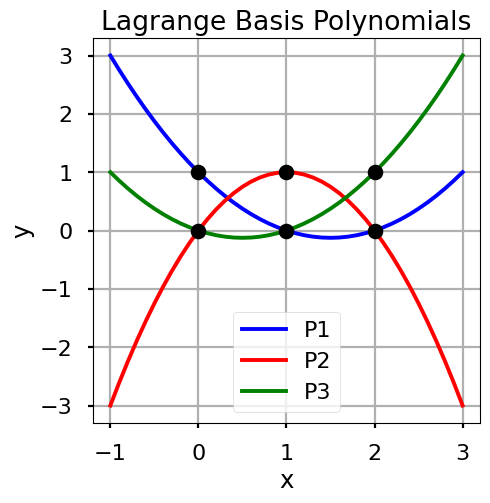

In [25]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (5,5))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

 **For the previous example, compute and plot the Lagrange polynomial and verify that it goes through each of the data points.**

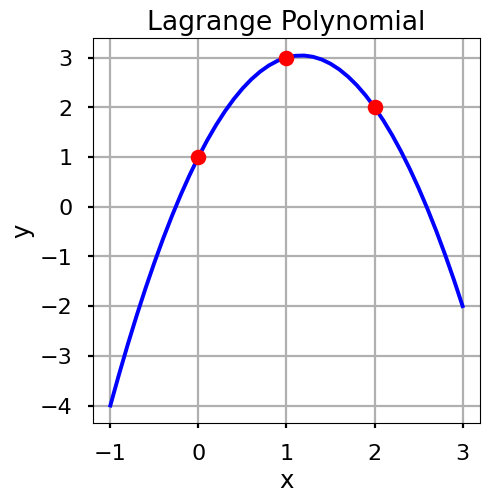

In [20]:
L = P1 + 3*P2 + 2*P3

fig = plt.figure(figsize = (5,5))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Use the lagrange function directly to interpolate the data.**

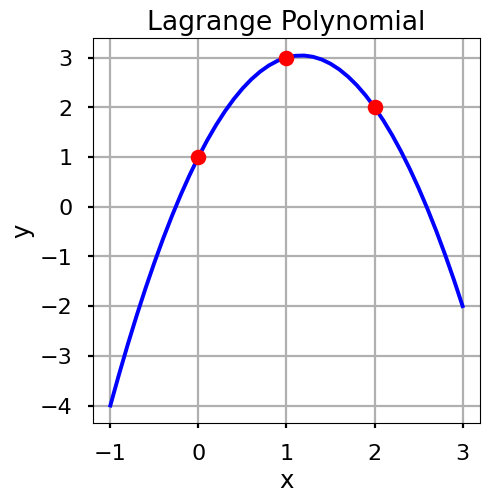

In [23]:
from scipy.interpolate import lagrange

f = lagrange(x, y)

fig = plt.figure(figsize = (5,5))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# **17.5 Newton’s Polynomial Interpolation**

*Newton's polynomial interpolation is an efficient method used in numerical analysis where we can fit exactly a set of data points. It uses the method of divided differences.*

*It is useful if a polynomial function needs to be found that passes through these data points since additional points can be added without recalculating the polynomial, thus making it more advantageous as compared to the Lagrange polynomial. However, one must be careful when using this mthod with large datasets as it can be tricky and even computationally intensive.*

**Calculate the divided differences table for x = [-5, -1, 0, 2], y = [-2, 6, 1, 3].**

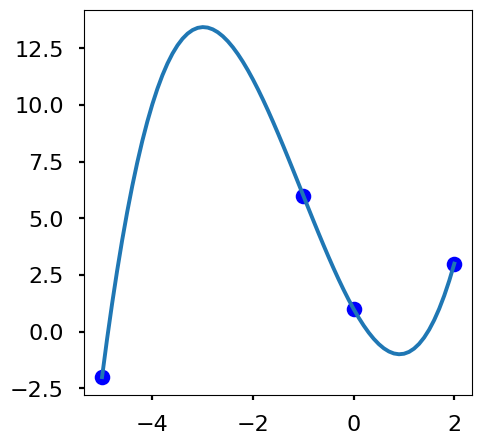

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (5, 5))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

**Calculate the divided differences table for x = [-2, -1, 0, 1], y = [-1, 2, 2, 1].**

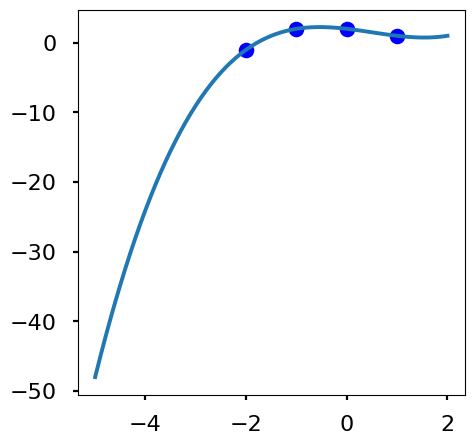

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x, y):

    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):

    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = np.array([-2, -1, 0, 1])
y = np.array([-1, 2, 2, 1])
a_s = divided_diff(x, y)[0, :]

x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (5, 5))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)